In [83]:
#TODO: Add code to use GPU

Edit this cell to read the file wanted. NOTE: will only work for csv files in the form of patient, features, outcome. 

In [84]:
import pandas as pd
filename1 = "selected_features_stat.csv" # Add filename
filename2 = "selected_features_dyn.csv"
static = pd.read_csv(filename1) # Load in Data
dynamic = pd.read_csv(filename2) # Load in Data

## Random Forest:

Runs a Random Forest Model on the static and dynamic data loaded in above. 

In [85]:
import numpy as np
%run RF.py 

static_actual, static_predicted, static_mean_feature_importances, static_X = RF(static)
print()
dyn_actual, dyn_predicted, dyn_mean_importances, dyn_X = RF(dynamic)
# plots(data)

Training Fold: 
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 
---------------- Random Forest ----------------
Root Mean Squared Error:  16.280492980649388
Feature Importance Values: , 0.01921874507454735, 0.150959551038571, 0.11776282116662291, 0.0505386129846102, 0.19901563722343082, 0.15411171419955505, 0.036035009405872585, 0.05363242968774373, 0.1456828125214079, 0.07304266669763851
Actual: , 38.4, 17.4667, 37.2, 16.8667, 36.2667, 14.6667, 51.0333, 6.6667, 54.3667, 30.7, 49.8667, 36.8, 15.1, 8.4333, 4.8667, 3.6, 32.3667, 7.4667, 33.9667, 43.1667, 31.5, 46.7333, 52.5, 36.2333, 17.6333, 7.7667, 20.4333, 11.2, 12.4, 44.6, 13.1, 5.5667, 19.3333, 4.9
Predct: , 31.5266, 15.3682, 17.4519, 22.159, 15.626, 31.8684, 31.8368, 17.0513, 28.014, 34.0527, 32.0441, 31.4356, 25.6044, 19.8721, 34.5752, 15.8157, 30.581, 28.1419, 18.5031, 22.7665, 33.8988, 23.1404, 28.0076, 26.35, 36.2565, 25.7479, 32.0603, 38.3667, 19.6876, 23.4594, 27.9555, 21.0106, 19.

Uses the data above to create three plots:
1. Actual patient results (either static_actual or dyn_actual will work) compared to the static and dynamic predictions
2. The Static vs Dynamic Feature Importance plot. NOTE: both models have diffrent features 
3. The Residual Plot of the static and dynamic predictions

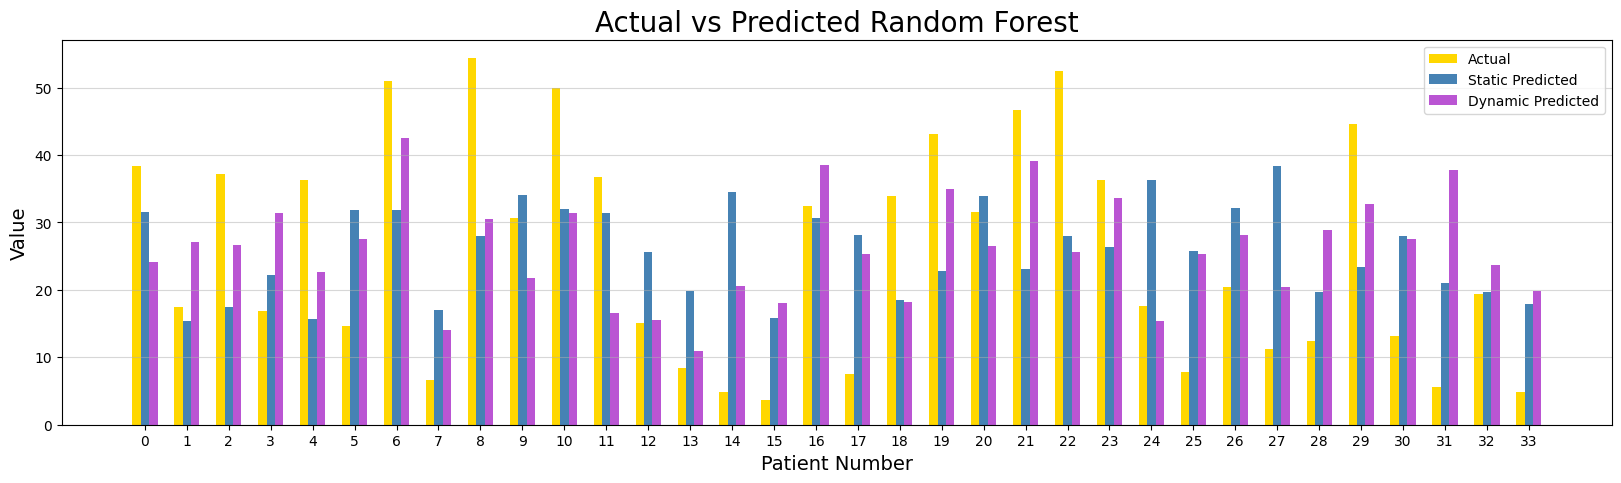

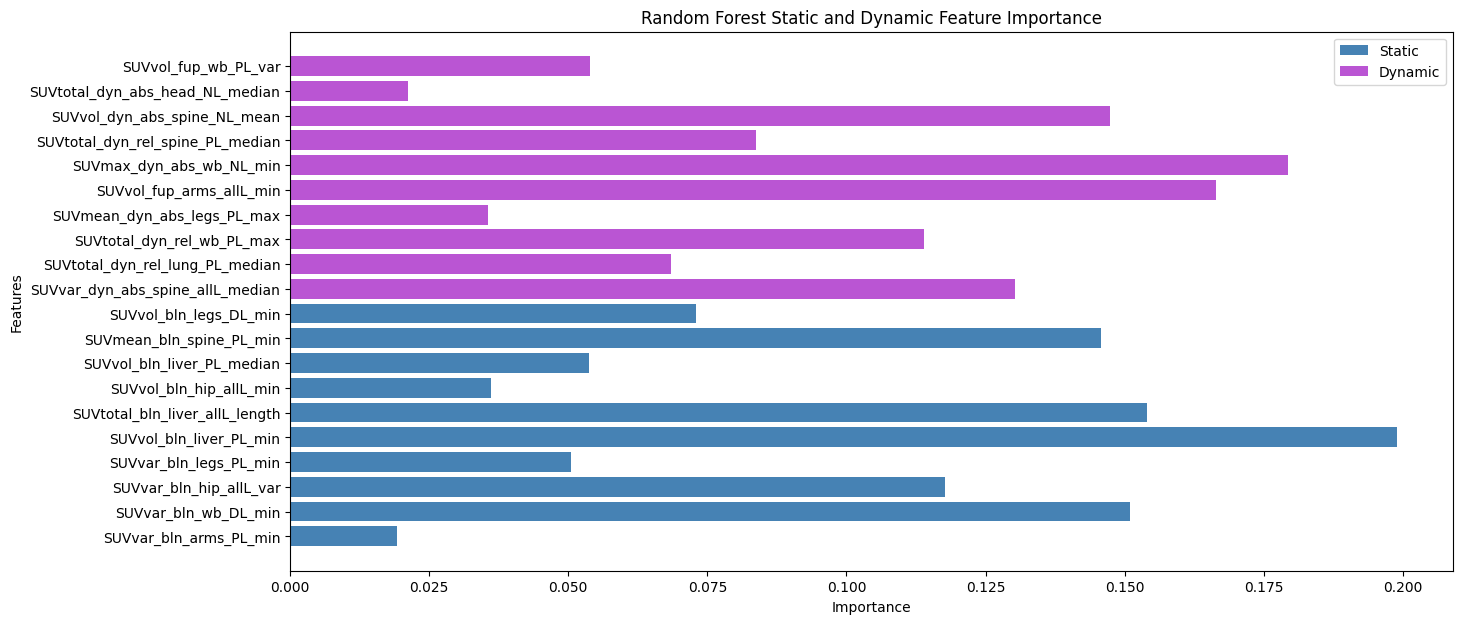

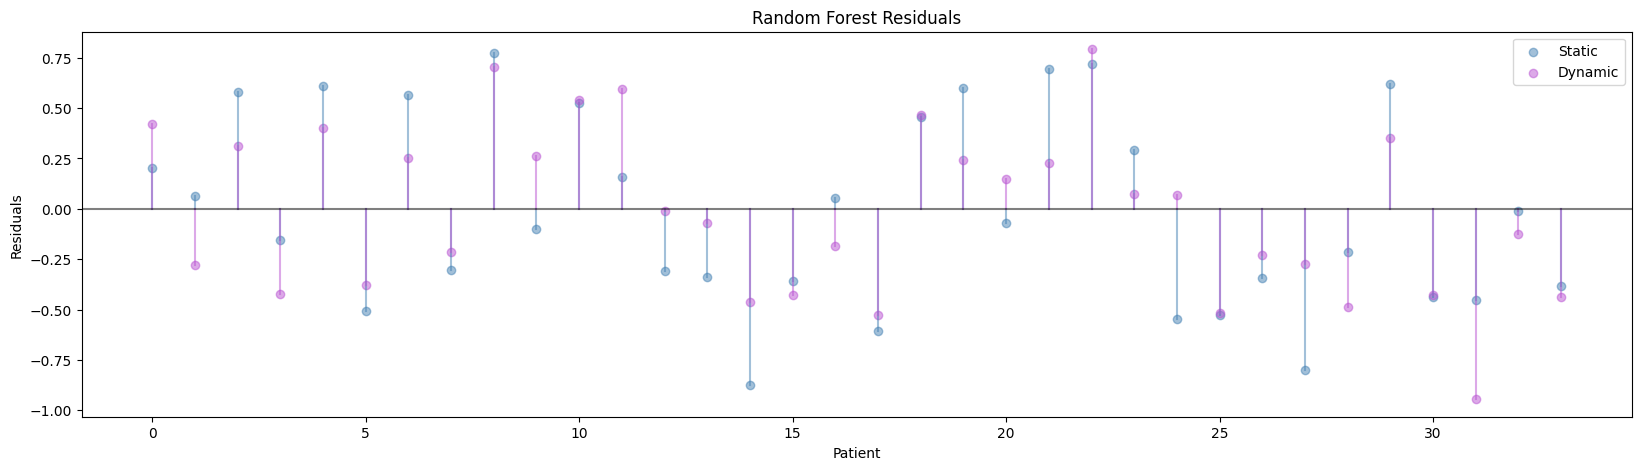

In [86]:
import matplotlib.pyplot as plt
%run RF.py 
# actual, static, dyn
ActualvsPredict(static_actual, static_predicted, dyn_predicted)
FeatureImportance(static_mean_feature_importances, dyn_mean_importances, static_X, dyn_X)
residualPlot(static_actual, static_predicted, dyn_actual, dyn_predicted)

Writes results to a worksheet called RandomForest in values.xlsx. NOTE: File must be closed to write

In [87]:
from itertools import zip_longest
import pandas as pd

data = list(zip_longest(static_predicted, dyn_predicted, static_mean_feature_importances, dyn_mean_importances))

df = pd.DataFrame(data, columns=['Static Predicted', 'Dynamic Predicted', 'Static Feature Importance', 'Dynamic Feature Importance'])

# write the DataFrame to an Excel file and overwrite the existing worksheet
with pd.ExcelWriter('values.xlsx', engine='openpyxl', mode='w') as writer:
    df.to_excel(writer, sheet_name='RandomForest', index=False)

## LightGBM

I created two functions ParamStatic and ParamDyn to store the best parameters after training the model using OPtuna. If you would like to train the model using OPTuna uncomment the lightGBMLOOptuna function while commenting out the ParamStatic and Dyn functions. Feel free to tweak the number of trials, and run the model. 

In [88]:
%run LightGBM.py 
# add your number of trails for optuna. longer trials -> better parameters, but longer runtime
# n_trails = 200
# static_best_param = lightGBMLOOOptuna("selected_features_stat.csv", n_trails)
# dyn_best_param = lightGBMLOOOptuna("selected_features_dyn.csv", n_trails)

static_best_param = ParamStatic()
dyn_best_param = ParamDyn()

static_mean_feature_importances, static_X, static_actual, static_predicted = lightGBMLOO(static, static_best_param)
print()
dyn_mean_feature_importances, dyn_X, dyn_actual, dyn_predicted = lightGBMLOO(dynamic, dyn_best_param)
# plots(data, params)

Training Fold: 
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 
------------ LightGBM ------------
RMSE:  15.716260053687746
Feature Importance Values: , 0.0, 1.4411764705882353, 1.7941176470588236, 0.0, 122.61764705882354, 65.47058823529412, 0.0, 0.0, 4.676470588235294, 0.0
Actual: , 38.4, 17.4667, 37.2, 16.8667, 36.2667, 14.6667, 51.0333, 6.6667, 54.3667, 30.7, 49.8667, 36.8, 15.1, 8.4333, 4.8667, 3.6, 32.3667, 7.4667, 33.9667, 43.1667, 31.5, 46.7333, 52.5, 36.2333, 17.6333, 7.7667, 20.4333, 11.2, 12.4, 44.6, 13.1, 5.5667, 19.3333, 4.9
Predct: , 21.4216, 21.1465, 29.2407, 21.1767, 20.2008, 30.4324, 28.5091, 24.6809, 27.1159, 28.3065, 26.9265, 29.2618, 21.2656, 21.601, 29.6061, 22.086, 29.9154, 24.5972, 21.8777, 20.9232, 28.2662, 20.5627, 26.7062, 29.2918, 28.9638, 24.5774, 23.2656, 29.2875, 21.4014, 27.6072, 25.6647, 21.7452, 21.0526, 21.9712

Training Fold: 
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 3

NOTE: I need to investigate how LightGBM claculates feature importance. 

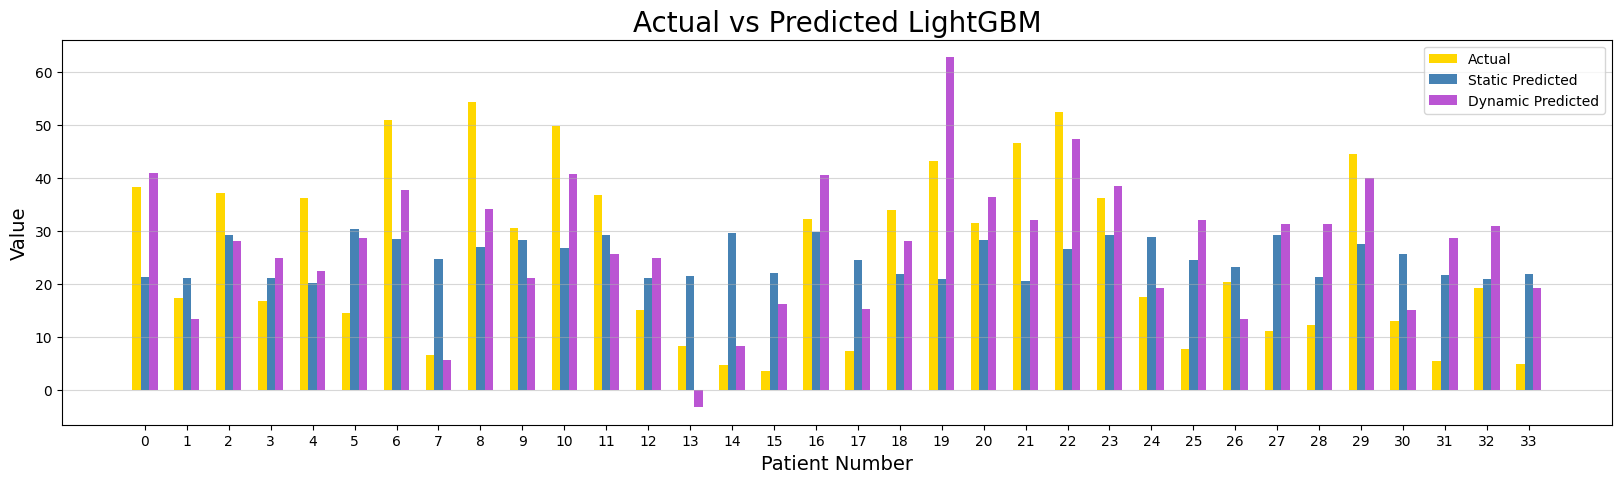

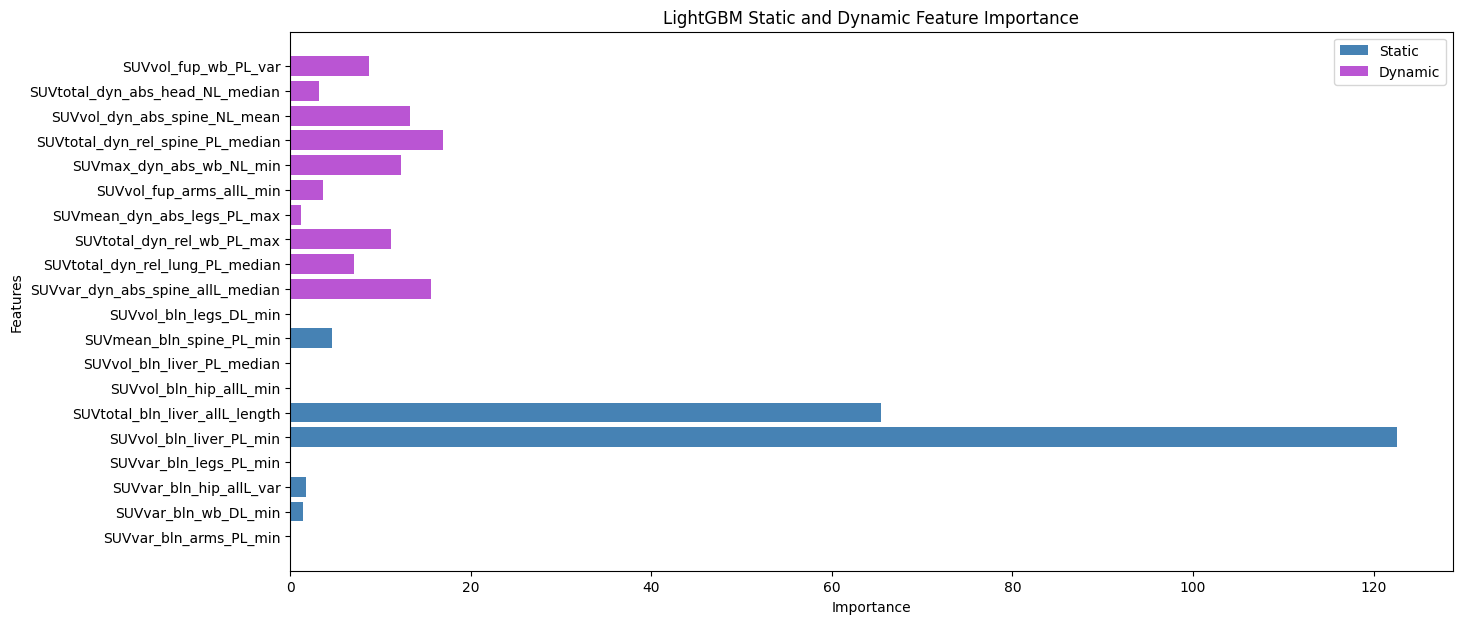

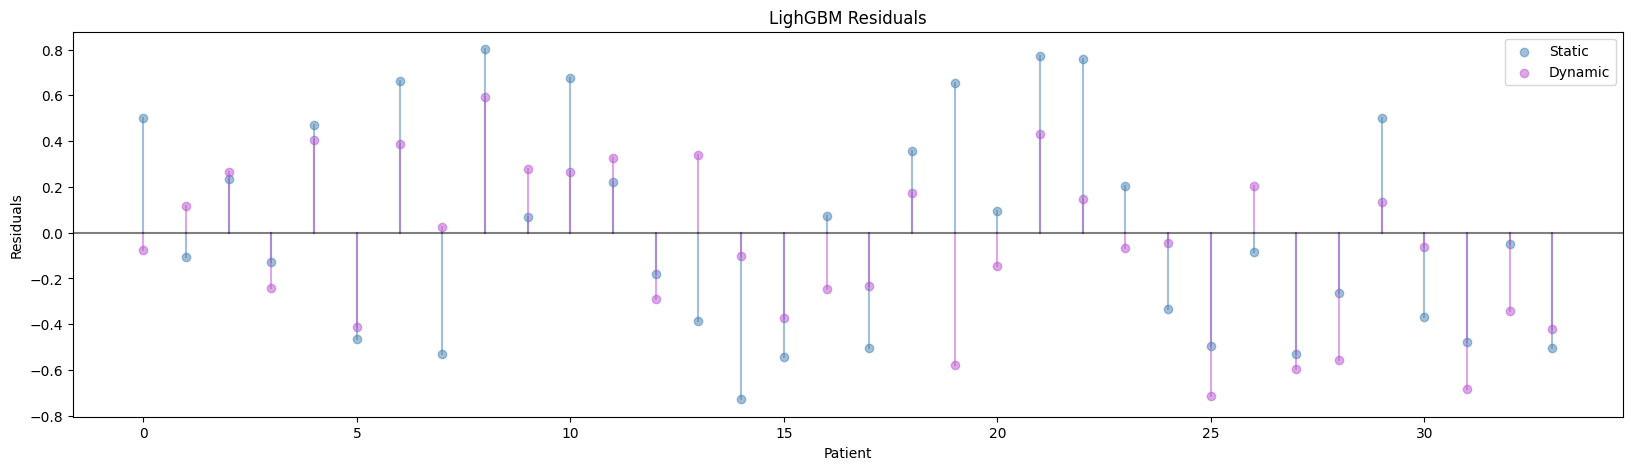

In [89]:
import matplotlib.pyplot as plt
%run LightGBM.py 
# actual, static, dyn
ActualvsPredict(static_actual, static_predicted, dyn_predicted)
FeatureImportance(static_mean_feature_importances, dyn_mean_feature_importances, static_X, dyn_X)
residualPlot(static_actual, static_predicted, dyn_actual, dyn_predicted)
# TODO: standardize feature importance. 

Writes to values.xlsx worksheet LightGBM. NOTE: Cannot have file open when writing

In [90]:
from itertools import zip_longest
import pandas as pd

data = list(zip_longest(static_predicted, dyn_predicted, static_mean_feature_importances, dyn_mean_feature_importances))

df = pd.DataFrame(data, columns=['Static Predicted', 'Dynamic Predicted', 'Static Feature Importance', 'Dynamic Feature Importance'])

# write the DataFrame to an Excel file and overwrite the existing worksheet
with pd.ExcelWriter('values.xlsx', engine='openpyxl', mode='w') as writer:
    df.to_excel(writer, sheet_name='LightGBM', index=False)

## XGBoost

Same as LightGBM. However, when running this model it took over 35 mins using OPTuna so if you are running XGBoostOptuna it will take some time. 

In [91]:
%run XGBoost.py 
# add your number of trails for optuna. longer trials -> better parameters, but longer runtime
n_trails = 200
# static_best_param = XGBoostOptuna("selected_features_stat.csv", n_trails)
# dyn_best_param = XGBoostOptuna("selected_features_dyn.csv", n_trails)

static_best_param = ParamStatic()
dyn_best_param = ParamDyn()

static_mean_feature_importances, static_X, static_actual, static_predicted = XGBoost(static, static_best_param)
print()
dyn_mean_feature_importances, dyn_X, dyn_actual, dyn_predicted = XGBoost(dynamic, dyn_best_param)
# plots(data, params)

Training Fold: 
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 
------------ XGBoost ------------
RMSE:  13.882048884244245
Feature Importance Values: , 0.006627835, 0.10074348, 0.05665905, 0.023923252, 0.10105708, 0.0844763, 0.045857266, 0.14576244, 0.02443079, 0.4104625
Actual: , 38.4, 17.4667, 37.2, 16.8667, 36.2667, 14.6667, 51.0333, 6.6667, 54.3667, 30.7, 49.8667, 36.8, 15.1, 8.4333, 4.8667, 3.6, 32.3667, 7.4667, 33.9667, 43.1667, 31.5, 46.7333, 52.5, 36.2333, 17.6333, 7.7667, 20.4333, 11.2, 12.4, 44.6, 13.1, 5.5667, 19.3333, 4.9
Predct: , 31.5246, 14.6133, 25.7049, 28.4949, 11.8906, 29.7087, 30.2541, 8.739, 33.5293, 31.2214, 44.9366, 37.1935, 25.2403, 13.7633, 23.6829, 13.4348, 31.9409, 16.5391, 15.8496, 36.1284, 44.4778, 26.0524, 33.2297, 24.4941, 42.5578, 14.5986, 33.0074, 38.2195, 18.0009, 22.1137, 16.565, 15.3277, 18.4783, 17.7584

Training Fold: 
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31

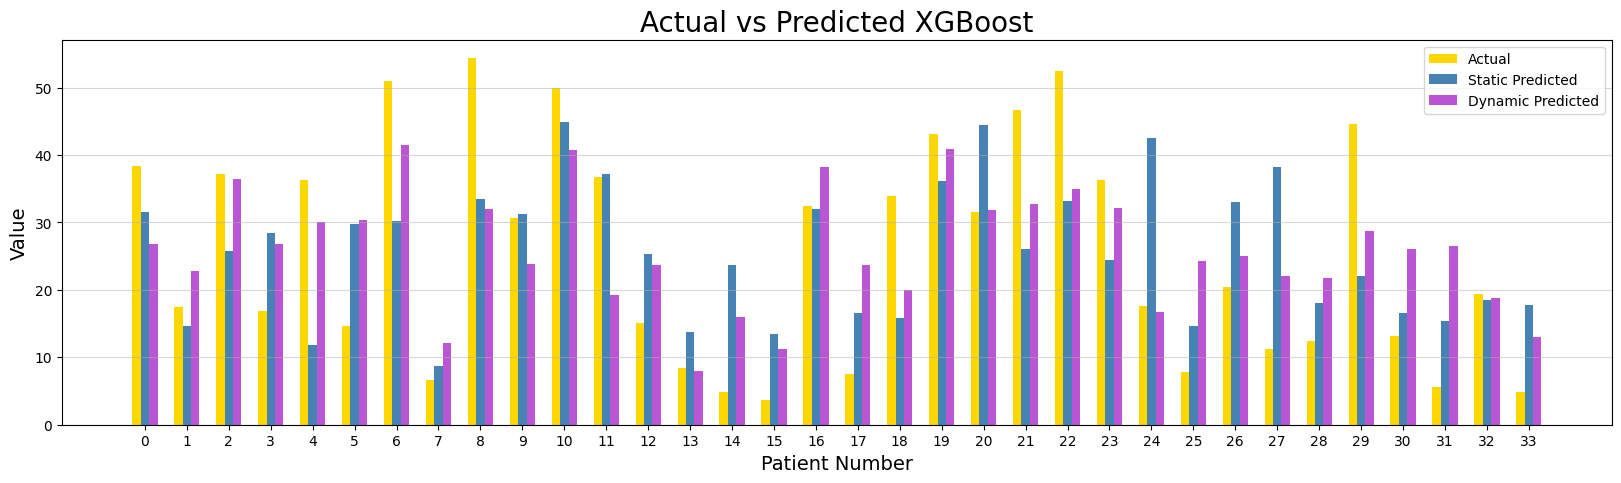

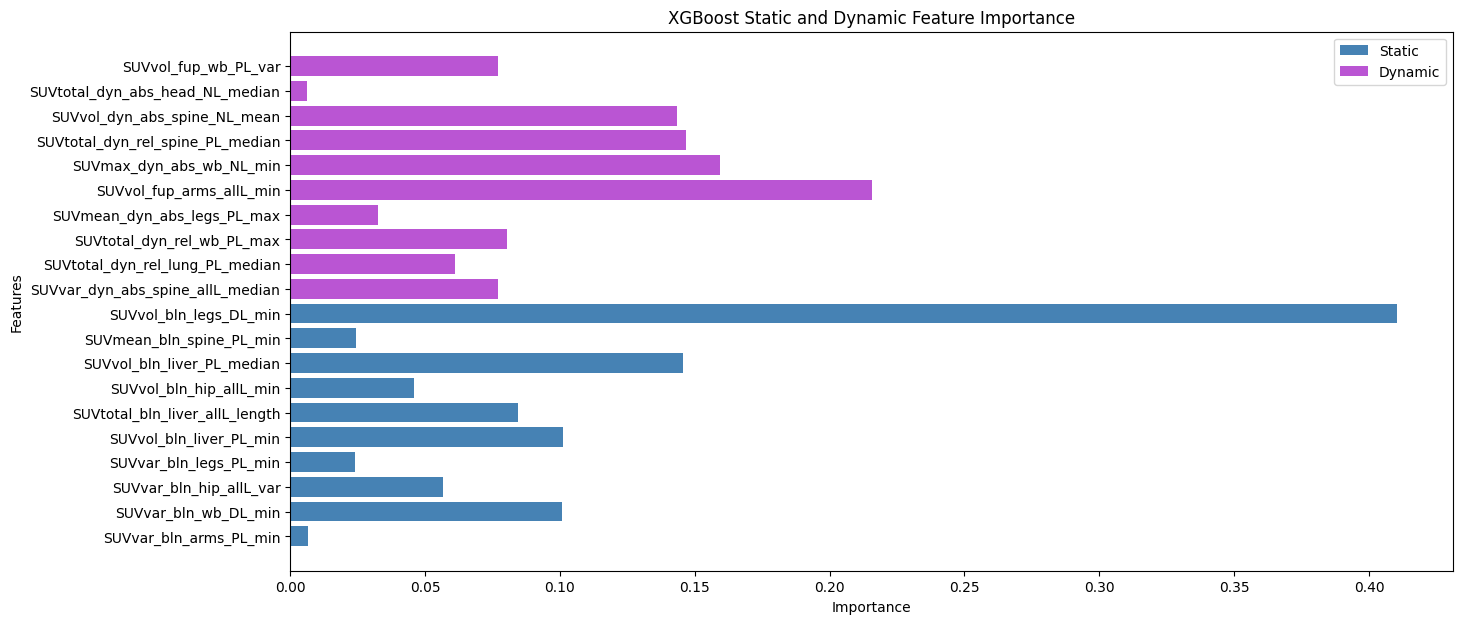

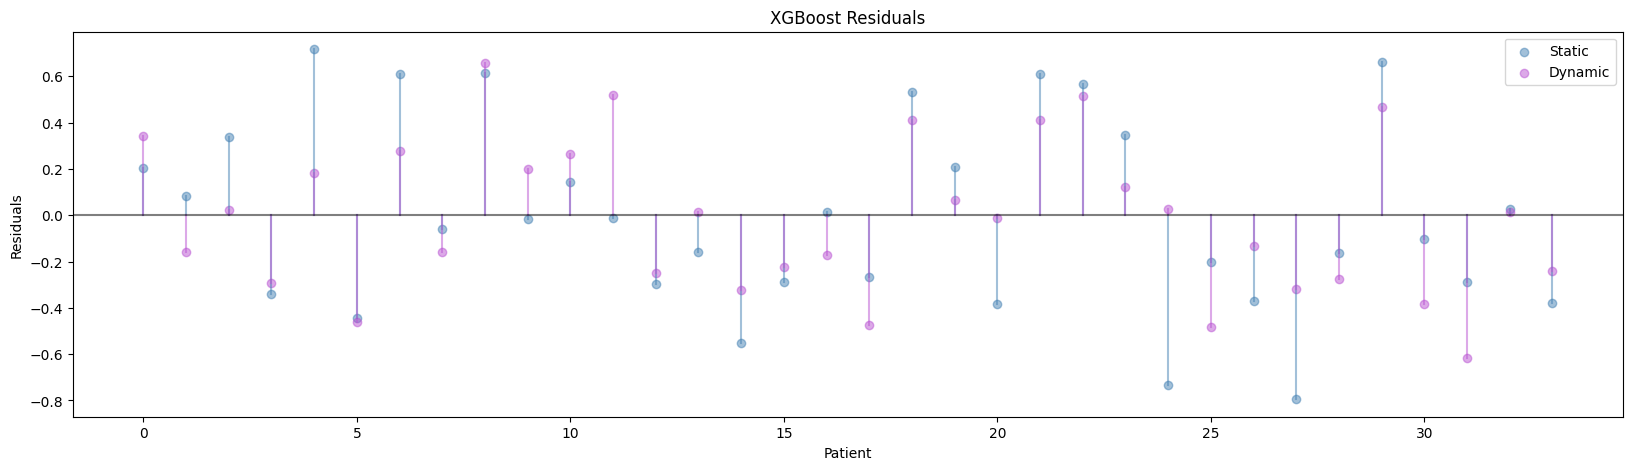

In [92]:
import matplotlib.pyplot as plt
%run XGBoost.py 
# actual, static, dyn
ActualvsPredict(static_actual, static_predicted, dyn_predicted)
FeatureImportance(static_mean_feature_importances, dyn_mean_feature_importances, static_X, dyn_X)
residualPlot(static_actual, static_predicted, dyn_actual, dyn_predicted)

Writes results to a worksheet called XGBoost in values.xlsx. NOTE: File must be closed to write

In [93]:
from itertools import zip_longest
import pandas as pd

data = list(zip_longest(static_predicted, dyn_predicted, static_mean_feature_importances, dyn_mean_feature_importances))

df = pd.DataFrame(data, columns=['Static Predicted', 'Dynamic Predicted', 'Static Feature Importance', 'Dynamic Feature Importance'])

# write the DataFrame to an Excel file and overwrite the existing worksheet
with pd.ExcelWriter('values.xlsx', engine='openpyxl', mode='w') as writer:
    df.to_excel(writer, sheet_name='XGBoost', index=False)

## MultiLinearRegression

In [94]:
%run MultiLinearRegression.py 
static_actual_mlr, static_predicted_mlr, static_mean_feature_importances_mlr, static_X_mlr = MLR(static)
print()
dyn_actual_mlr, dyn_predicted_mlr, dyn_mean_importances_mlr, dyn_X_mlr = MLR(dynamic)

Training Fold: 
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 
--------- MultiLinearRegression ---------
RMSE:  20.233732543499624
Feature Importance Values: , 0.2873975814202982, 0.1550219080329438, 0.000403258078883821, 0.03493419061875401, 0.13192468274557123, 0.026703515109477344, 0.1878315846486017, 0.007029353025439145, 0.025616663109115787, 0.14313726321091502
Actual: , 38.4, 17.4667, 37.2, 16.8667, 36.2667, 14.6667, 51.0333, 6.6667, 54.3667, 30.7, 49.8667, 36.8, 15.1, 8.4333, 4.8667, 3.6, 32.3667, 7.4667, 33.9667, 43.1667, 31.5, 46.7333, 52.5, 36.2333, 17.6333, 7.7667, 20.4333, 11.2, 12.4, 44.6, 13.1, 5.5667, 19.3333, 4.9
Predct: , 22.8336, 5.9154, 22.5873, 19.4561, 35.3796, 23.2857, 69.2635, -23.5488, 39.4597, 33.1437, 31.1363, 25.3098, 15.0894, 11.6864, 28.8356, 24.079, 29.0328, 38.1618, 16.112, 28.5151, 32.4301, 24.1413, 10.7885, 31.365, 30.1607, 24.6518, 28.4432, 36.9059, -55.9819, 25.7778, 19.0348, -5.2457, 20.3042, 18.1606

Tr

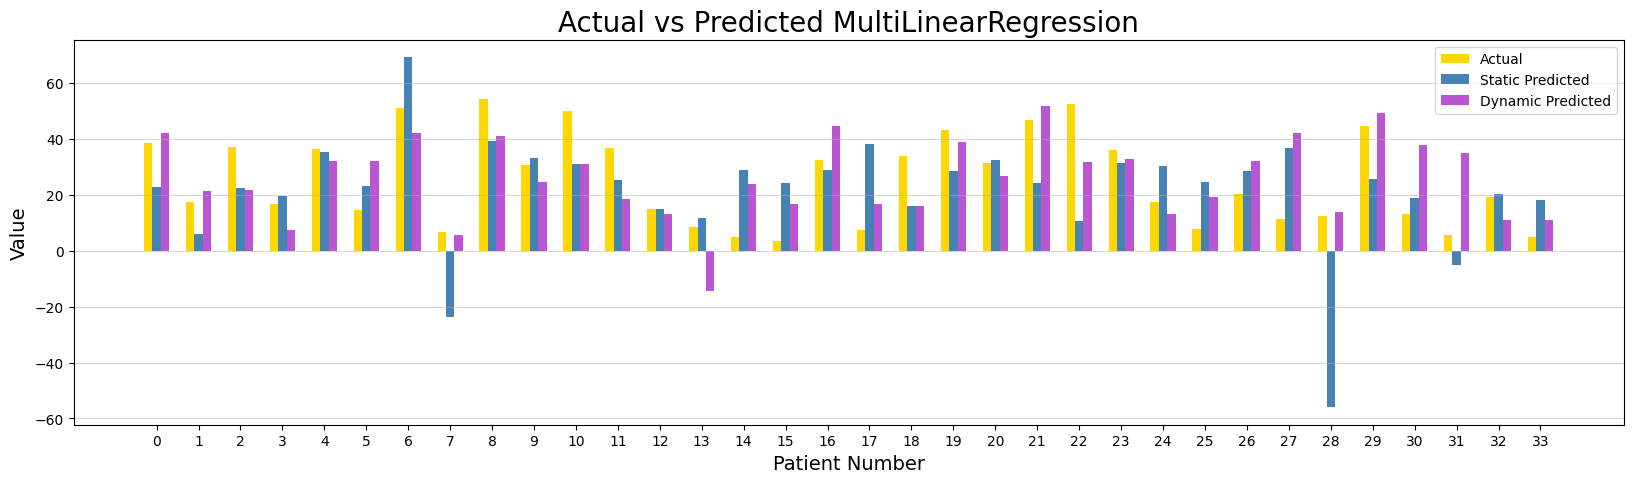

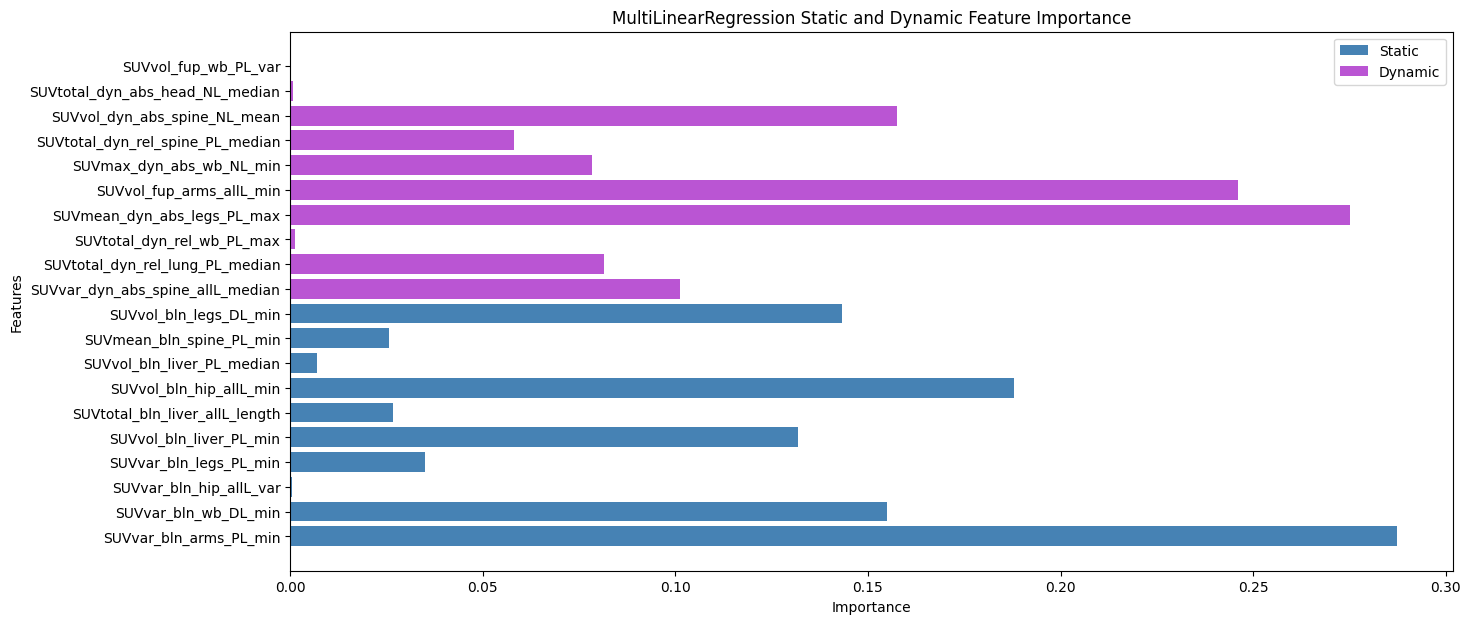

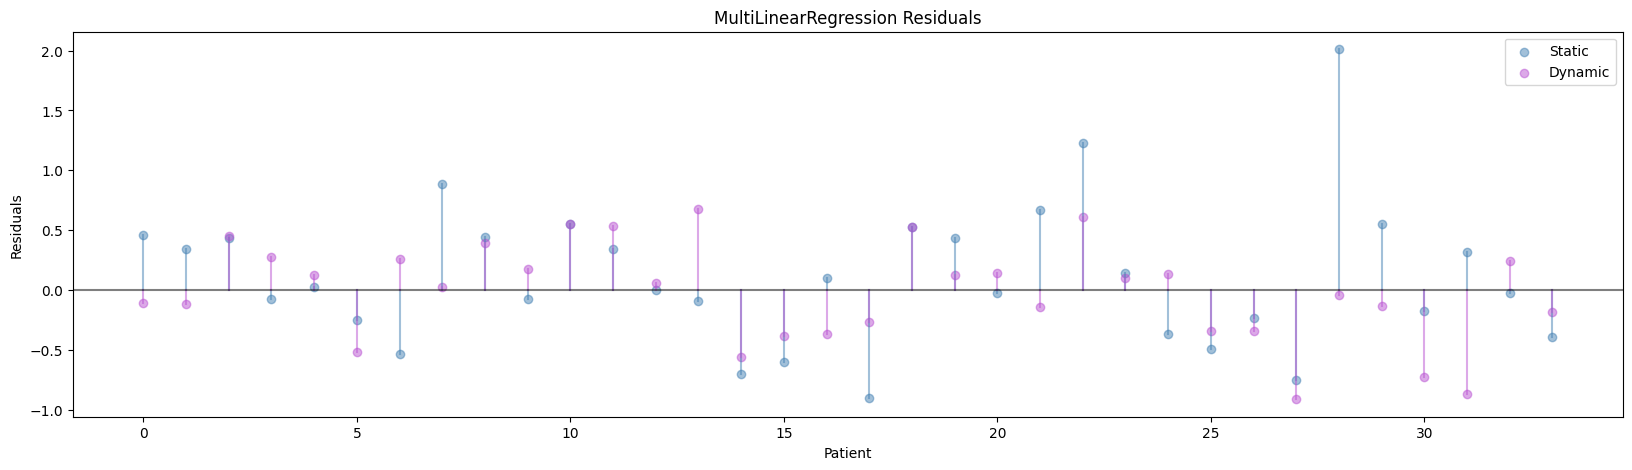

In [95]:
import matplotlib.pyplot as plt
%run MultiLinearRegression.py 
# actual, static, dyn
ActualvsPredict(static_actual_mlr, static_predicted_mlr, dyn_predicted_mlr)
FeatureImportance(static_mean_feature_importances_mlr, dyn_mean_importances_mlr, static_X_mlr, dyn_X_mlr)
residualPlot(static_actual_mlr, static_predicted_mlr, dyn_actual_mlr, dyn_predicted_mlr)

Writes results to a worksheet called MultiLinearReg in values.xlsx. NOTE: File must be closed to write

In [96]:
from itertools import zip_longest
import pandas as pd

data = list(zip_longest(static_predicted, dyn_predicted, static_mean_feature_importances, dyn_mean_feature_importances))

df = pd.DataFrame(data, columns=['Static Predicted', 'Dynamic Predicted', 'Static Feature Importance', 'Dynamic Feature Importance'])

# write the DataFrame to an Excel file and overwrite the existing worksheet
with pd.ExcelWriter('values.xlsx', engine='openpyxl', mode='w') as writer:
    df.to_excel(writer, sheet_name='MultiLinearReg', index=False)